In [13]:
#####################
### Data Analysis ###
#####################

## Please set your working directory to the data/ folder

# Clear the workspace
rm(list = ls())

# Load necessary packages
library(dplyr) # data manipulation
library(Synth) # models

# Load data
df <- read.csv("df.csv", header = TRUE)

# Prepare dataset
df$state <- as.character(df$state) # required by dataprep()

# Plot: Homicide rates for Sao Paulo and Brazil (average)
df1 <- df %>%
        mutate(homicide.sp = ifelse(homicide.rates & state == "São Paulo", homicide.rates, NA)) %>%
        select(year, homicide.sp)

df2 <- df %>%
        mutate(homicide.rates1 = ifelse(homicide.rates & state != "São Paulo", homicide.rates, NA)) %>%
        group_by(year) %>%
        summarise(homicide.br = mean(homicide.rates1, na.rm = TRUE))

In [2]:
setwd("C:/Users/abdur/Downloads")

In [28]:
# Prepare data for synth
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1998, "mean"),
                         list("proportion.extreme.poverty", 1990:1998, "mean"),
                         list("gini.imp", 1990:1998, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:17, 21:27, 31:33, 50:53),
                 time.predictors.prior = c(1990:1998),
                 time.optimize.ssr     = c(1990:1998),
                 time.plot             = c(1990:2009)
                 )

In [29]:
# Run synth
synth.out <- synth(dataprep.out)

# Get result tables
print(synth.tables   <- synth.tab(
        dataprep.res = dataprep.out,
        synth.res    = synth.out)
      )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1.337372 

solution.v:
 0.3481811 3.2229e-06 1.6535e-06 0.06444402 0.5526459 0.03429752 0.0004266551 

solution.w:
 3.78169e-05 2.77833e-05 2.14643e-05 0.203065 7.95332e-05 2.09824e-05 1.42641e-05 1.28039e-05 1.03171e-05 1.20037e-05 1.52434e-05 1.10306e-05 6.8327e-06 9.5792e-06 4.5189e-06 7.049e-07 4.701e-07 0.3351121 0.1195302 0.0001781216 0.3418292 

$tab.pred
                                             Treated Synthetic Sample Mean
state.gdp.capita                              23.285    23.245      11.134
state.gdp.growth.percent                       1.330     3.696       3.537
population.projection.ln                      17.335    14.041      14.730
years.schooling.imp                            6.089     6.138       4.898
special.homicide.rates.1990.1998              32.672    32.681      23.

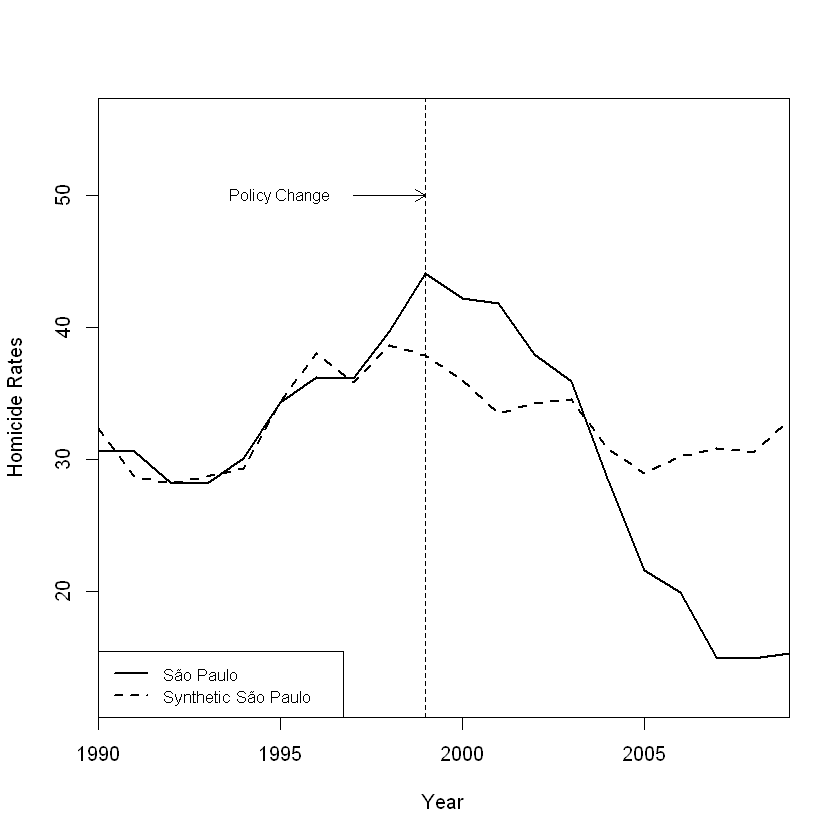

In [30]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8)

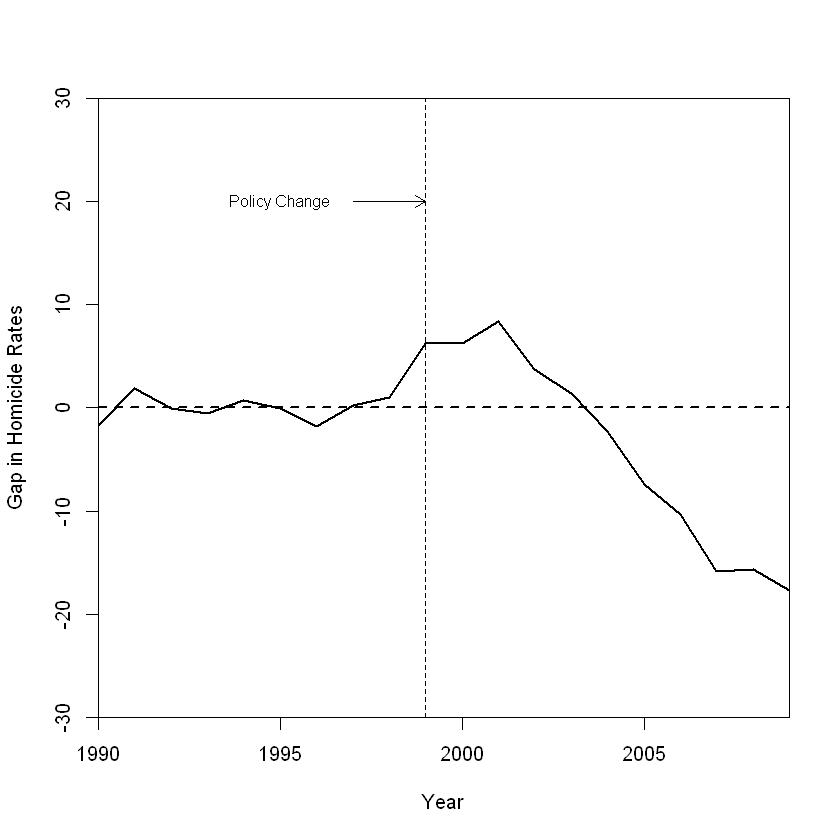

In [31]:
gaps.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Gap in Homicide Rates"),
          Xlab         = c("Year"),
          Ylim         = c(-30, 30),
          Main         = ""
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 20, 1999, 20,
       col    = "black",
       length = .1)

text(1995, 20,
     "Policy Change",
     cex = .8)

invisible(dev.off())



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1.232199 

solution.v:
 0.007073677 0.000582191 5.34625e-05 0.03850344 0.8829641 0.004358415 0.06646476 

solution.w:
 0.2867383 0.0004984827 0.0003941605 0.03591178 0.0003100246 0.4788134 0.0002523855 0.0002990029 4.91165e-05 0.0001019517 0.0001412146 9.78757e-05 0.0001757229 0.0002454153 0.0002640348 0.0002968673 1.2354e-05 0.0004120988 0.0009936894 0.0005753162 0.0003692331 0.0004729994 0.0002626421 0.192312 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 9.696465 

solution.v:
 0.06103391 0.01408394 0.4490766 0.03322913 0.0864128 0.01137627 0.3447874 

solution.w:
 4.4654e-06 1.25e-06 2.94e-06 2.6025e-06 2.9188e-06 2.6755e-06 1.0631e-06 5.2061e-06 4.15e-08

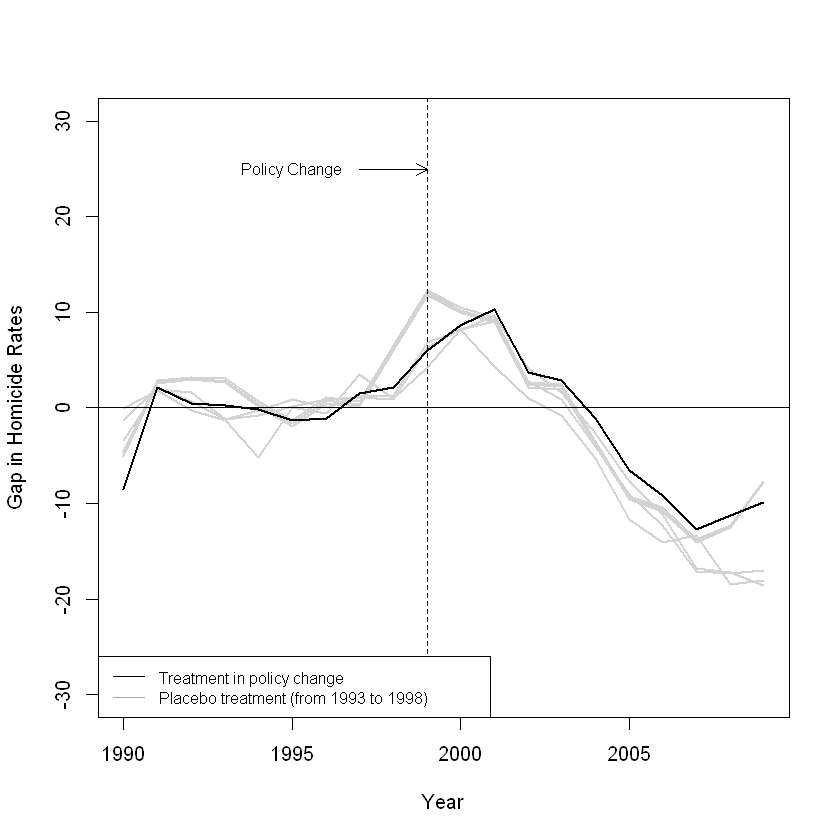

In [36]:
######
#Placebo across time 
######


results <- list()
results_synth <- list()
gaps <- list()

#Years
treatment.years <- c(1993, 1994, 1995, 1996, 1997, 1998, 1999) # For treatment years


for (i in 1:7) {
    # Prepare data for synth
    dataprep.out <-
            dataprep(df,
                     predictors = c("state.gdp.capita",
                                    "state.gdp.growth.percent",
                                    "population.projection.ln",
                                    "years.schooling.imp"
                                    ),
                     special.predictors = list(
                             list("homicide.rates", 1990:treatment.years[i], "mean"),
                             list("proportion.extreme.poverty", 1990:treatment.years[i], "mean"),
                             list("gini.imp", 1990:treatment.years[i], "mean")
                             ),
                     predictors.op = "mean",
                     dependent     = "homicide.rates",
                     unit.variable = "code",
                     time.variable = "year",
                     unit.names.variable   = "state",
                     treatment.identifier  = 35,
                     controls.identifier   = c(11:17, 21:27, 31:33, 41:43, 50:53),
                     time.predictors.prior = c(1990:treatment.years[i]),
                     time.optimize.ssr     = c(1990:treatment.years[i]),
                     time.plot             = c(1990:2009)
                     )

    results[[as.character(i)]] <- dataprep.out
    results_synth[[as.character(i)]] <- synth(results[[as.character(i)]])
    gaps[[as.character(i)]] <- results[[as.character(i)]]$Y1plot - (results[[as.character(i)]]$Y0plot %*% results_synth[[as.character(i)]]$solution.w)

    
}

plot(1990:2009,
     ylim = c(-30, 30),
     xlim = c(1990,2009),
     ylab = "Gap in Homicide Rates",
     xlab = "Year"
)

for (i in 1:6) {
        lines(1990:2009,
              gaps[[as.character(i)]],
              col = "lightgrey",
              lty = "solid",
              lwd = 2
        )
}

lines(1990:2009,
      gaps[[as.character(7)]], # São Paulo
      col = "black",
      lty = "solid",
      lwd = 2
)

abline(v   = 1999,
       lty = 2)

abline(h   = 0,
       lty = 1,
       lwd = 1)

arrows(1997, 25, 1999, 25,
       col    = "black",
       length = .1)

text(1995, 25,
     "Policy Change",
     cex = .8)

legend(x = "bottomleft",
       legend = c("Treatment in policy change",
                  "Placebo treatment (from 1993 to 1998)"),
       lty  = c("solid", "solid"),
       col  = c("black", "darkgrey"),
       cex  = .8,
       bg  = "white",
       lwdc(2, 2, 1)
)

In [44]:
# Placebo in Year for 1993
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1993, "mean"),
                         list("proportion.extreme.poverty", 1990:1993, "mean"),
                         list("gini.imp", 1990:1993, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:17, 21:27, 31:33, 50:53),
                 time.predictors.prior = c(1990:1993),
                 time.optimize.ssr     = c(1990:1993),
                 time.plot             = c(1990:2009)
                 )

In [45]:
synth.out <- synth(dataprep.out)




X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.9178901 

solution.v:
 0.03223693 0.0007251265 0.0006462065 0.4201806 0.4472004 0.0569129 0.04209774 

solution.w:
 0.2913024 4.578e-07 3.488e-07 6.6574e-06 5.795e-07 0.3548859 2.656e-07 1.675e-07 9.31e-08 1.356e-07 1.642e-07 1.222e-07 1.455e-07 1.768e-07 1.0429e-06 3.305e-07 1.2188e-06 7.05e-07 0.1046044 5.103e-07 0.2491941 



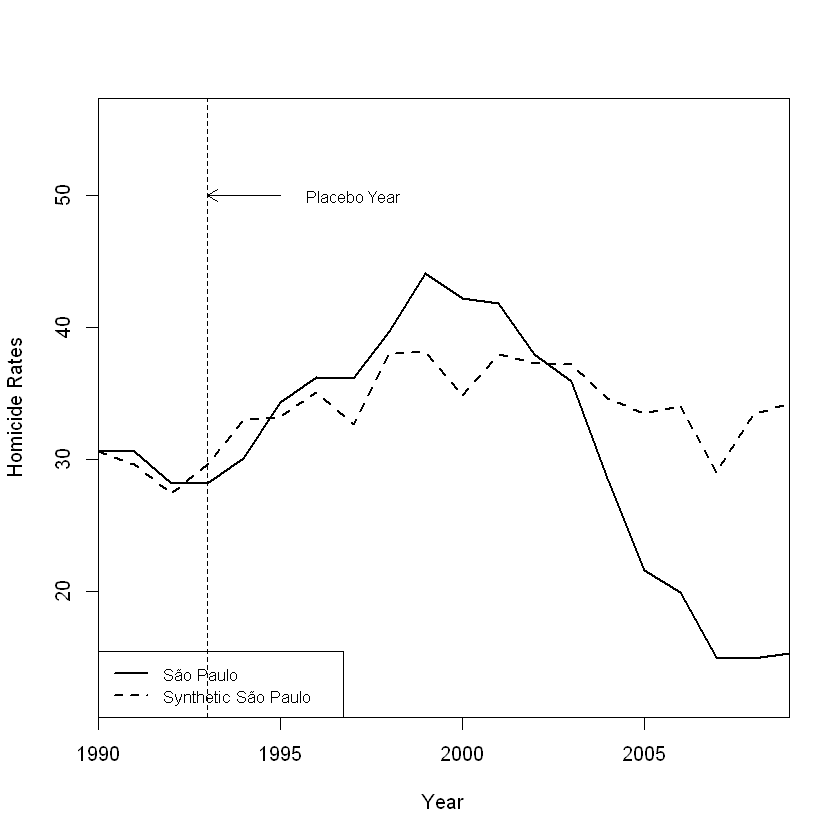

In [46]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1993,
       lty = 2)

arrows(1995, 50, 1993, 50,
       col    = "black",
       length = .1)

text(1997, 50,
     "Placebo Year",
     cex = .8)

In [47]:
# Placebo in Time for 1996
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1996, "mean"),
                         list("proportion.extreme.poverty", 1990:1996, "mean"),
                         list("gini.imp", 1990:1996, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:17, 21:27, 31:33, 50:53),
                 time.predictors.prior = c(1990:1996),
                 time.optimize.ssr     = c(1990:1996),
                 time.plot             = c(1990:2009)
                 )

In [48]:
synth.out <- synth(dataprep.out)



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1.571657 

solution.v:
 0.3069045 0.002274773 0.001245622 0.199818 0.2382428 0.2504166 0.001097664 

solution.w:
 0.0008566608 7.56646e-05 5.4444e-05 0.2077493 0.0002400823 7.83345e-05 4.48783e-05 5.15784e-05 3.35308e-05 4.09887e-05 4.15359e-05 4.15594e-05 5.73598e-05 4.94991e-05 0.04786105 0.0002757329 1.5077e-06 0.4135615 4.65e-07 0.0005695042 0.3283148 



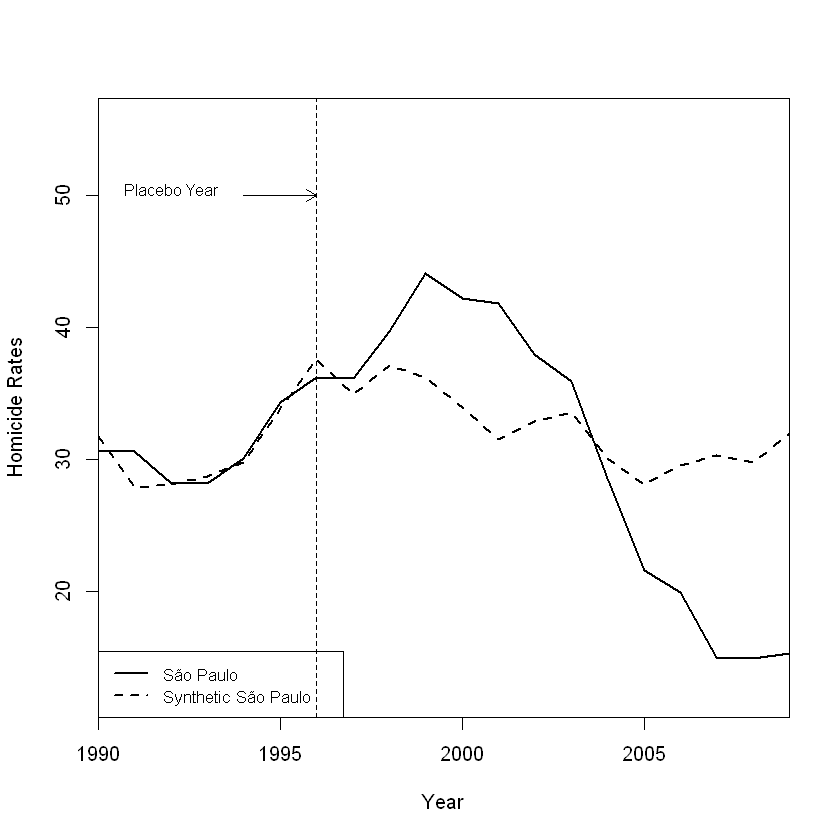

In [52]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1996,
       lty = 2)

arrows(1994, 50, 1996, 50,
       col    = "black",
       length = .1)

text(1992, 50.5,
     "Placebo Year",
     cex = .8)

In [62]:
#Robustness test of Synth Control by removing most heavily weighted component of Control
#Mato Grase De sul, number 50 makes up 33.5% of the Synthetic Control, so that can be removed to see the effect
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1998, "mean"),
                         list("proportion.extreme.poverty", 1990:1998, "mean"),
                         list("gini.imp", 1990:1998, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:17, 21:27, 31:33, 51:53),
                 time.predictors.prior = c(1990:1998),
                 time.optimize.ssr     = c(1990:1998),
                 time.plot             = c(1990:2009)
                 )

In [63]:
# Run synth
synth.out <- synth(dataprep.out)

# Get result tables
print(synth.tables   <- synth.tab(
        dataprep.res = dataprep.out,
        synth.res    = synth.out)
      )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 4.688186 

solution.v:
 0.0008135932 5.03427e-05 0.00491594 3.17629e-05 0.4589422 0.5352382 7.9198e-06 

solution.w:
 9.5874e-06 3.2289e-06 3.5845e-06 0.1287655 1.00741e-05 2.1079e-06 1.0592e-06 9.457e-07 7.665e-07 1.008e-06 1.2673e-06 1.002e-06 8.007e-07 8.927e-07 0.1845312 1.9003e-06 0.1440867 5.9763e-06 9.0662e-06 0.5425634 

$tab.pred
                                             Treated Synthetic Sample Mean
state.gdp.capita                              23.285    31.956      11.097
state.gdp.growth.percent                       1.330     2.438       3.526
population.projection.ln                      17.335    14.842      14.744
years.schooling.imp                            6.089     6.811       4.891
special.homicide.rates.1990.1998              32.672    32.882      22.825
special.proportion.e

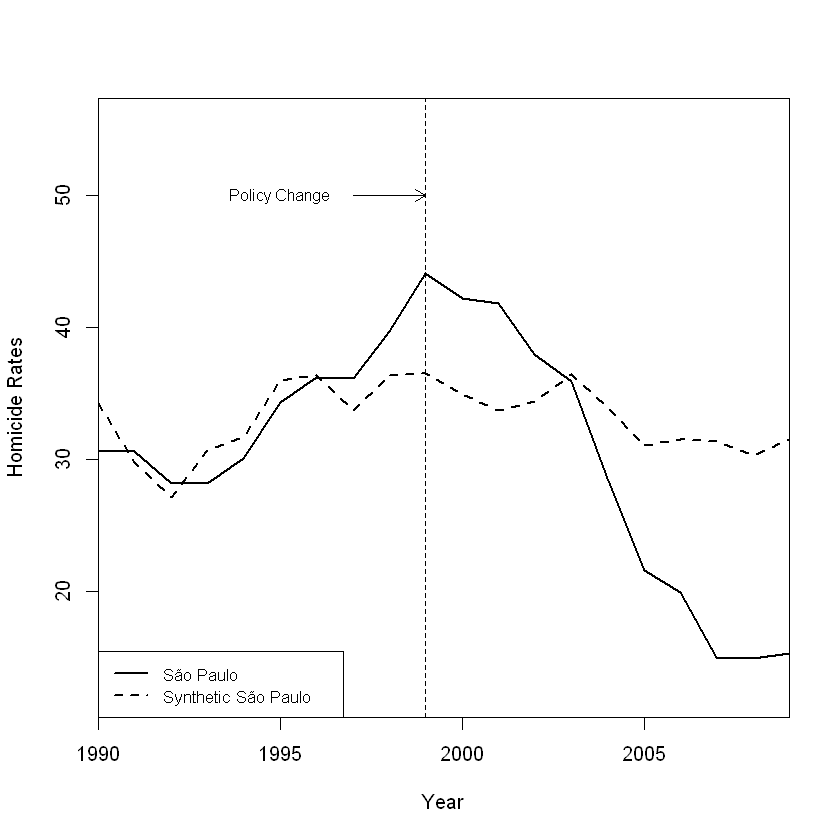

In [64]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8) ### Now we see that Rio De Janeiro, number 33 is the biggest contributor to the Synth control

#Now we see that the Synthetic Control does not perform too well

In [65]:
#Now Lets remove number 53 which is distrito federal
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1998, "mean"),
                         list("proportion.extreme.poverty", 1990:1998, "mean"),
                         list("gini.imp", 1990:1998, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:17, 21:27, 31:33, 51,52),
                 time.predictors.prior = c(1990:1998),
                 time.optimize.ssr     = c(1990:1998),
                 time.plot             = c(1990:2009)
                 )
# Run synth
synth.out <- synth(dataprep.out)

# Get result tables
print(synth.tables   <- synth.tab(
        dataprep.res = dataprep.out,
        synth.res    = synth.out)
      )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 9.249122 

solution.v:
 3.54731e-05 0.5731176 0.0001926144 0.001258443 0.4137768 0.008524735 0.003094308 

solution.w:
 1.85264e-05 2.16953e-05 4.2984e-06 0.07898075 0.4629033 1.177e-05 1.95707e-05 0.0003571666 1.3215e-05 6.7941e-06 6.7671e-06 1.20897e-05 9.6343e-06 1.31481e-05 0.0001347615 1.01819e-05 0.4574333 7.2573e-06 3.57711e-05 

$tab.pred
                                             Treated Synthetic Sample Mean
state.gdp.capita                              23.285    14.407       9.253
state.gdp.growth.percent                       1.330     1.352       3.559
population.projection.ln                      17.335    15.681      14.763
years.schooling.imp                            6.089     5.886       4.743
special.homicide.rates.1990.1998              32.672    32.740      22.181
special.prop

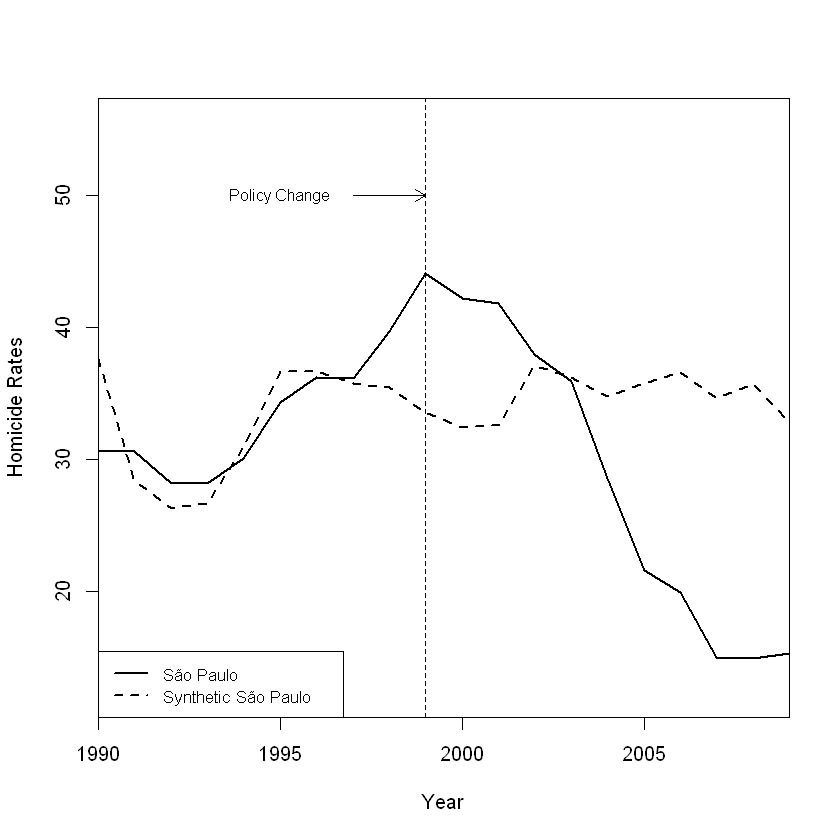

In [66]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8) ### Now we see that Rio De Janeiro, number 33 is the biggest contributor to the Synth control
#The performance has gone worse, specifically at the treatment introduction time period

In [67]:
#Now Lets remove number 15 as it is the most heavily weighted - Parai is number 15
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1998, "mean"),
                         list("proportion.extreme.poverty", 1990:1998, "mean"),
                         list("gini.imp", 1990:1998, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:14,16,17, 21:27, 31:33, 51,52),
                 time.predictors.prior = c(1990:1998),
                 time.optimize.ssr     = c(1990:1998),
                 time.plot             = c(1990:2009)
                 )
# Run synth
synth.out <- synth(dataprep.out)

# Get result tables
print(synth.tables   <- synth.tab(
        dataprep.res = dataprep.out,
        synth.res    = synth.out)
      )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 10.90496 

solution.v:
 0.0001775473 0.2054967 4.1825e-06 0.0001447481 0.7903149 0.002200001 0.001661898 

solution.w:
 0.0005799884 0.0006339273 0.0002148569 0.1091572 0.0004339576 0.0005505593 0.002806239 0.0003922515 0.0002436306 0.0002538448 0.000353029 0.0002815209 0.000384452 0.3828659 0.0003585031 0.4994773 0.0003018901 0.0007109215 

$tab.pred
                                             Treated Synthetic Sample Mean
state.gdp.capita                              23.285    16.916       9.314
state.gdp.growth.percent                       1.330     1.362       3.651
population.projection.ln                      17.335    16.051      14.721
years.schooling.imp                            6.089     5.861       4.721
special.homicide.rates.1990.1998              32.672    32.691      22.647
special

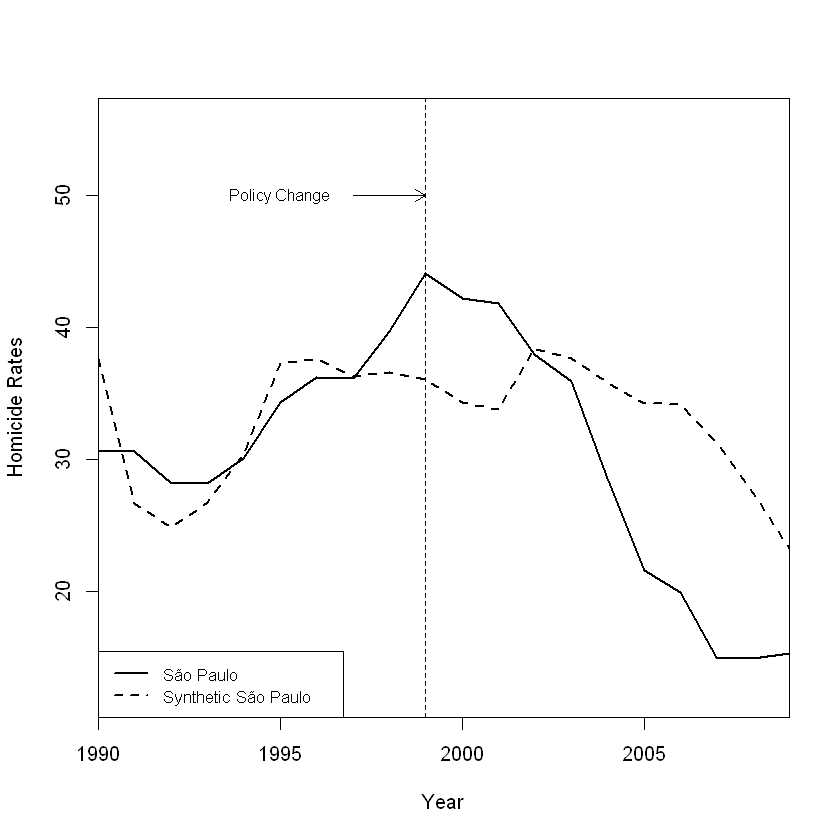

In [68]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8)
#It is increasingly evident that the performance is not improving so this will end the test.